# Final Project Report

* Class: DS 5100
* Student Name: Jonathan Swap
* Student Net ID: js7jx
* This URL: https://github.com/Jonathan-swap/ds5100-finalproject-js7jx/blob/main/montecarlo/ds5100_final_project_files/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/Jonathan-swap/ds5100-finalproject-js7jx

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

# A code block with your classes.

```python
import numpy as np
import pandas as pd
import random
import itertools

class Die():
    """This class, Die, creates an n dimensional die with equal, defualt weights, 
    or better thought of as probabilities, that can be adjusted as needed. 
    Additionally, this die can be rolled n many times and the state of the die, 
    also known as the compiled list of the n rolls can be retrieved at any point."""

    def __init__(self, faces):
        '''
        PURPOSE: initializes the weights from the input face values.

        INPUT: a NumPy array of either strings or integers that will name the sides of the die
        OUTPUT: a private dataframe with faces in the index.
        '''
        self.faces = faces
        if isinstance(self.faces,np.ndarray) != True:
            raise TypeError('faces argument is not a NumPy array. Please enter a NumPy array')
        if len(np.unique(faces)) != len(faces):
              raise ValueError('Please enter unique face names.')
        for n in self.faces:
            if type(n) != np.str_ and type(n) != np.int_ and type(n) != np.float_:
                raise TypeError('faces data type is not a string or integer. Please only enter strings or integers.')
        self.weights = np.ones(len(self.faces))
        self._facesweights = pd.DataFrame(self.weights, index = self.faces)

    def set_weight(self,facevalue,newweight):
        '''PURPOSE: to change the weight of the faces for the die.

            INPUT: the face value that you want to change, which should be a string or integer, 
            and the new weight you want to assign it which should be an integer or float
            OUTPUT: an updated dataframe that has the new weight values for the faces you wanted to change
            '''
        if facevalue not in self.faces:
            raise IndexError('The face value is not in the array of faces you input originally.')
        if (type(newweight) != int and type(newweight) != float):
            raise TypeError('The new weight is not an integer or float. Please input a float or integer for the new weight.')
        try:
            self._facesweights.loc[facevalue] = newweight
            self.weights = self._facesweights['Weights']
        except: KeyError

    def roll_dice(self,rolls = 1):
        '''PURPOSE: to randomly sample the die, aka roll the die, while taking into consideration 
        the number of faces the die has and their respective weights. It adds the selection to a list.

            INPUT: number of rolls, otherwise defaults to 1 roll
            OUTPUT: It returns a list with the roll results.
            '''
        roll_list = np.random.choice(a=self.faces,p=[i/sum(self.weights) for i in self.weights],size=rolls)
        return roll_list.copy()

    def get_dies_state(self):
        '''PURPOSE: to see the state of die, which holds the faces and weights of the die.

        INPUT: no inputs
        OUTPUT: a dataframe of the faces and weights of the die.
        '''
        return self._facesweights

class Game():
    """This class, Game, rolls a list of instantiated die and only keep the results 
    of their most recent play. Each die has the same number of sides, and each game
    is initialized with a python list of one or more die.""" 
    def __init__(self, listofinstantiateddice):
        '''PURPOSE: Initializes a list of dice into the game method. 

            INPUT: the list of instatiated dice is a list with individual die
            OUTPUT: nothing
            '''
        self.listofinstantiateddice = listofinstantiateddice
        self._private_outcome_df = pd.DataFrame()
    
    def play_game(self,numberoftimes): 
        '''PURPOSE: this method rolls the die as many times as you want, but is defualted at 1 roll, for each 
        die in the list of die you originally input and then appends those results to the private dataframe.
         
            INPUT: the number of times you want to roll all your die. This will default to 1 roll if not specified
            OUTPUT: no output
        '''
        for i,x in enumerate(self.listofinstantiateddice):
            self._private_outcome_df[f' die number {i+1}'] = x.roll_dice(numberoftimes)
        
    def most_recent(self, form = 'wide'):
        '''PURPOSE: To show you your most recent results in the table format of your choosing, between 'narrow' and 'wide'.

            INPUT:  you can specify the format of the table that you want, if you dont specify 'narrow', the other option, 
            it will default to 'wide'
            OUTPUT: it will return the data frame of results from your play game method in the format of your choosing. 
            It will raise a valueerror if you dont enter a valid form argument.
            '''
        if form.lower() == 'narrow':
            return self._private_outcome_df.stack().copy()
        if form.lower() == 'wide':
            return self._private_outcome_df.copy()
        else:
            raise ValueError("Invalid option for dataframe form. Must be 'narrow' or 'wide'")

class Analyzer():
    """This class, the Analyzer class, will provide functions to determine whether you have gotten 
    a jackpot and evaluate the number of each face value in the most recent roll. Additionally, you 
    can see the number of times each possible combinations and permutations was rolled"""
    def __init__(self,gameobject):
        '''PURPOSE: to initialize a gameobject, a game that has been played with any number of die. 

            INPUT: a game object, which should be an instance from the Game class.
            OUTPUT: it will raise a ValueError if the gameobject is not from the Game class.
            '''
        if not isinstance(gameobject, Game):
            raise ValueError('This game object is not an instance of the Game class.')
        self.gameobject = gameobject

    def jackpot(self):
        '''PURPOSE: This method will tell you the number of jackpots you win, the same face value being shown on all die. 

        INPUT: no inputs
        OUTPUT: it returns a counter that goes through each of the rows in the dataframe and if the row has one unique 
        character, aka all the face values are the same, it adds one to the counter. 
        '''
        self.counter = 0
        for i in self.gameobject._private_outcome_df.index:
            i = i-1
            row = np.array(self.gameobject._private_outcome_df.iloc[i])
            if len(np.unique(row)) == 1:
                self.counter += 1
        return self.counter
        
    def facecounts_per_roll(self):
        '''PURPOSE: this will return a dataframe with how often each face value is rolled each roll for the game.

        INPUT: no inputs
        OUTPUT: a data frame with columns for each face values, the indices area the roll numbers, and the valeus 
        are how often that face value was shown in that one roll.
        '''
        return pd.DataFrame(self.gameobject.most_recent()).apply(pd.Series.value_counts,axis = 1).fillna(0)

    def combo_count(self):
        '''PURPOSE: this functions looks at all the possible combinations with the face values and appends that to a list. 
        Then creates a multiindex using the tuples of combinations and populates it with the number of times that combination
        was rolled in the game.

        INPUT: no inputs
        OUTPUT: a dataframe with one column of the frequency that combination was rolled in the game.
        '''
        combinationlist = list(itertools.combinations_with_replacement(
            list(self.gameobject.listofinstantiateddice[0].faces),
            len(self.gameobject.listofinstantiateddice)))
        combinationindex = pd.MultiIndex.from_tuples(combinationlist)
        combinationdf = pd.DataFrame(index=combinationindex)
        combinationdf['frequency'] = self.gameobject.most_recent().apply(lambda row: tuple(np.sort(row))).value_counts().to_frame()
        return combinationdf.fillna(0)

    def permutation_count(self):
        '''PURPOSE: this functions looks at all the possible permutations with the face values and appends that to a list. 
        Then creates a multiindex using the tuples of permutations and populates it with the number of times that permutation
        was rolled in the game.

        INPUT: no inputs
        OUTPUT: a dataframe with one column of the frequency that permutation was rolled in the game.
        '''
        permutationdf = self.gameobject.most_recent().apply(lambda row: tuple(row)).value_counts().to_frame()
        return permutationdf
    ```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

# A code block with your test code.
```python
import unittest
from montecarlo.montecarlo import Die, Game, Analyzer
import numpy as np
import pandas as pd

class montecarloTest_die(unittest.TestCase): 
    
    def test_initialization(self):
        list_1 = [1,2,3,4,5,6]

        with self.assertRaises(TypeError):
            die1 = Die(list_1)

        die = Die(np.array([1,2,3,4,5,6]))
        self.assertIs(type(die._facesweights),pd.DataFrame)
    

    def test_set_weight(self):
        die = Die(np.array([1,2,3,4,5,6]))
        die.set_weight(1,5)
        self.assertTrue(die._facesweights[0][1]==5)
        
    def test_roll_dice(self):
        die = Die(np.array([1,2,3,4,5,6]))
        self.assertTrue(type(die.roll_dice(rolls=5)),list)

    def test_get_dies_state(self):
        die = Die(np.array([1,2,3,4,5,6]))
        self.assertIs(type(die.get_dies_state()),pd.DataFrame)
    

class montecarloTest_game(unittest.TestCase): 

    def test_initialization(self):
        die = Die(np.array([1,2,3,4,5,6]))
        listofdice = [die,die,die]
        game = Game(listofdice)
        self.assertIs(type(game._private_outcome_df),pd.DataFrame)
        self.assertIs(type(game),Game)
        self.assertIs(type(listofdice),list)
    
    def test_play_game(self):
        die = Die(np.array([1,2,3,4,5,6]))
        listofdice = [die,die,die]
        game = Game(listofdice)
        game.play_game(numberoftimes=6)
        self.assertTrue(game._private_outcome_df.shape[0] == 6)

    def test_most_recent(self):
        die = Die(np.array([1,2,3,4,5,6]))
        listofdice = [die,die,die]
        game = Game(listofdice)
        game.most_recent()
        self.assertIs(type(game._private_outcome_df),pd.DataFrame)
    
   
class montecarloTest_analyzer(unittest.TestCase): 

    def test_initialization(self):
        die = Die(np.array([1,2,3,4,5,6]))
        listofdice = [die,die,die]
        game = Game(listofdice)
        analyzer = Analyzer(game)
        self.assertIs(type(analyzer),Analyzer)
    
    def test_jackpot(self):
        die = Die(np.array([1,2,3,4,5,6]))
        listofdice = [die,die,die]
        game = Game(listofdice)
        analyzer = Analyzer(game)
        self.assertIs(type(analyzer.jackpot()),int)

    def test_facecounts_per_roll(self):
        die = Die(np.array([1,2,3,4,5,6]))
        listofdice = [die,die,die]
        game = Game(listofdice)
        analyzer = Analyzer(game)
        self.assertIs(type(analyzer.facecounts_per_roll()),pd.DataFrame)

    def test_combo_count(self):
        die = Die(np.array([1,2,3,4,5,6]))
        listofdice = [die,die,die]
        game = Game(listofdice)
        analyzer = Analyzer(game)
        self.assertIs(type(analyzer.combo_count()),pd.DataFrame)
    
    def test_permutation_count(self):
        die = Die(np.array([1,2,3,4,5,6]))
        listofdice = [die,die,die]
        game = Game(listofdice)
        analyzer = Analyzer(game)
        self.assertIs(type(analyzer.permutation_count()),pd.DataFrame)

if __name__ == '__main__': unittest.main(verbosity=3)

```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

# A text block with the output of a successful test.
```bash
/opt/miniconda3/envs/pythonbadge/bin/python /Users/jonathanswap/Desktop/MSDS_summer_semester/5100/ds5100-finalproject-js7jx/montecarlo/montecarlo_test.py
(pythonbadge) (base) jonathanswap@Jonathans-MacBook-Pro montecarlo % /opt/miniconda3/envs/pythonbadge/bin/python /Users/jonathanswap/Desktop/MSDS_summer_semester/5100/ds5100-fi
nalproject-js7jx/montecarlo/montecarlo_test.py
The function was imported successfully
test_combo_count (__main__.montecarloTest_analyzer.test_combo_count) ... ok
test_facecounts_per_roll (__main__.montecarloTest_analyzer.test_facecounts_per_roll) ... ok
test_initialization (__main__.montecarloTest_analyzer.test_initialization) ... ok
test_jackpot (__main__.montecarloTest_analyzer.test_jackpot) ... ok
test_permutation_count (__main__.montecarloTest_analyzer.test_permutation_count) ... ok
test_get_dies_state (__main__.montecarloTest_die.test_get_dies_state) ... ok
test_initialization (__main__.montecarloTest_die.test_initialization) ... ok
test_roll_dice (__main__.montecarloTest_die.test_roll_dice) ... ok
test_set_weight (__main__.montecarloTest_die.test_set_weight) ... ok
test_initialization (__main__.montecarloTest_game.test_initialization) ... ok
test_most_recent (__main__.montecarloTest_game.test_most_recent) ... ok
test_play_game (__main__.montecarloTest_game.test_play_game) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.008s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
from montecarlo.montecarlo import Die, Game, Analyzer


The function was imported successfully


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(Die)
help(Game)
help(Analyzer)

Help on class Die in module montecarlo.montecarlo:

class Die(builtins.object)
 |  Die(faces)
 |
 |  This class, Die, creates an n dimensional die with equal, defualt weights,
 |  or better thought of as probabilities, that can be adjusted as needed.
 |  Additionally, this die can be rolled n many times and the state of the die,
 |  also known as the compiled list of the n rolls can be retrieved at any point.
 |
 |  Methods defined here:
 |
 |  __init__(self, faces)
 |      PURPOSE: initializes the weights from the input face values.
 |
 |      INPUT: a NumPy array of either strings or integers that will name the sides of the die
 |      OUTPUT: a private dataframe with faces in the index.
 |
 |  get_dies_state(self)
 |      PURPOSE: to see the state of die, which holds the faces and weights of the die.
 |
 |      INPUT: no inputs
 |      OUTPUT: a dataframe of the faces and weights of the die.
 |
 |  roll_dice(self, rolls=1)
 |      PURPOSE: to randomly sample the die, aka roll the di

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/Jonathan-swap/ds5100-finalproject-js7jx/blob/main/README.md


## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [24]:
faircoin = Die(np.array(['T','H']))
unfaircoin = Die(np.array(['T','H']))
unfaircoin.set_weight('T',5)

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [25]:
mygame1 = Game([faircoin,faircoin])
mygame1.play_game(numberoftimes=1000)
mygame1.most_recent()

,die number 1,die number 2
0,T,T
1,H,H
2,H,H
3,T,T
4,H,H
...,...,...
995,H,T
996,T,H
997,H,T
998,T,T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [26]:
mygame2 = Game([faircoin,unfaircoin,unfaircoin])
mygame2.play_game(numberoftimes=1000)
mygame2.most_recent()


,die number 1,die number 2,die number 3
0,T,T,T
1,T,T,T
2,H,H,T
3,H,T,T
4,H,T,T
...,...,...,...
995,T,H,T
996,T,H,T
997,T,T,T
998,T,T,T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [27]:
myanalyzer1 = Analyzer(mygame1)
print(myanalyzer1.jackpot())
myanalyzer2 = Analyzer(mygame2)
print(myanalyzer2.jackpot())

488
367


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [28]:
myanalyzer1 = Analyzer(mygame1)
print(myanalyzer1.jackpot()/1000)
myanalyzer2 = Analyzer(mygame2)
print(myanalyzer2.jackpot()/1000)

0.488
0.367


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

<BarContainer object of 2 artists>

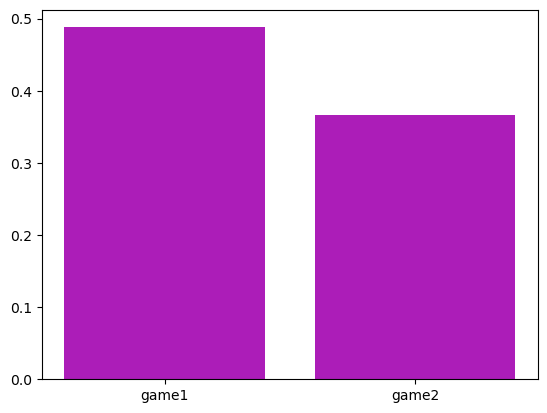

In [29]:
import matplotlib.pyplot as plt

myanalyzer1value = myanalyzer1.jackpot()/1000
myanalyzer2value = myanalyzer2.jackpot()/1000
myrelativefrequencies = [myanalyzer1value,myanalyzer2value]
labels = ['game1','game2']
plt.bar(labels,myrelativefrequencies,color = 'xkcd:barney')



## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [30]:
die1 = Die(np.array([1,2,3,4,5,6]))
die2 = Die(np.array([1,2,3,4,5,6]))
die3 = Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [31]:
die1.set_weight(6,5)
die1.get_dies_state()

,0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [32]:
die2.set_weight(1,5)
die2.get_dies_state()

,0
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [33]:
game1 = Game([die3,die3,die3,die3,die3])
game1.play_game(numberoftimes=10000)
game1.most_recent()

,die number 1,die number 2,die number 3,die number 4,die number 5
0,5,2,3,6,1
1,2,3,1,6,5
2,6,2,6,6,3
3,4,2,2,6,3
4,1,2,3,5,2
...,...,...,...,...,...
9995,3,2,6,6,5
9996,6,6,4,5,4
9997,6,2,5,5,5
9998,5,2,4,6,6


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [34]:
game2 = Game([die1,die2,die3,die3,die3])
game2.play_game(numberoftimes=10000)
game2.most_recent()

,die number 1,die number 2,die number 3,die number 4,die number 5
0,5,1,2,4,3
1,6,1,3,4,2
2,2,1,4,1,4
3,6,6,1,5,6
4,4,1,2,1,5
...,...,...,...,...,...
9995,1,1,5,6,1
9996,6,4,6,4,5
9997,3,4,5,6,2
9998,1,5,3,6,2


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

7
6


<BarContainer object of 2 artists>

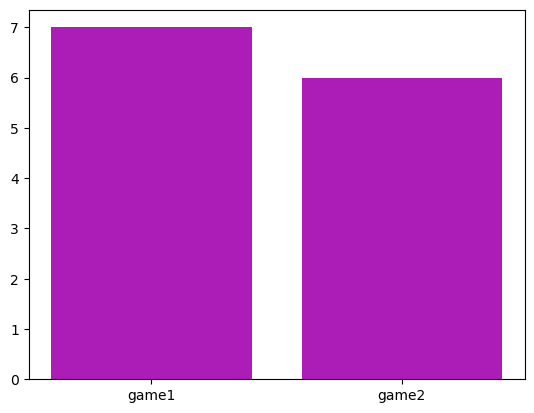

In [35]:
analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)



analyzer1value = analyzer1.jackpot()
analyzer2value = analyzer2.jackpot()
print(analyzer1value)
print(analyzer2value)
relativefrequencies = [analyzer1value,analyzer2value]
labels = ['game1','game2']
plt.bar(labels,relativefrequencies,color = 'xkcd:barney')


## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [83]:
lettersdf = pd.DataFrame(pd.read_csv('english_letters.txt',header=None,sep=' '))
letters = lettersdf[0].to_list()
print(letters)
weights = lettersdf[1]
die = Die(np.array(letters))
for i in range(len(weights)):
    die.set_weight(letters[i],int(weights[i]))
die_weights = die.get_dies_state()
die_weights[0] = die_weights[0]/sum(die_weights[0])
die_weights

['E', 'T', 'A', 'O', 'I', 'N', 'S', 'R', 'H', 'L', 'D', 'C', 'U', 'M', 'F', 'G', 'P', 'W', 'Y', 'B', 'V', 'K', 'J', 'X', 'Z', 'Q']


,0
E,0.120965
T,0.089381
A,0.085517
O,0.074673
I,0.073251
N,0.071722
S,0.067282
R,0.063327
H,0.049557
L,0.042065


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [84]:
game = Game([die,die,die,die])
game.play_game(numberoftimes=1000)
game.most_recent()

,die number 1,die number 2,die number 3,die number 4
0,L,E,W,I
1,E,S,C,T
2,T,N,H,I
3,E,O,N,D
4,N,A,L,S
...,...,...,...,...
995,E,E,O,F
996,L,C,S,I
997,A,F,G,L
998,R,O,H,O


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [87]:
analyzer = Analyzer(game)
analyzer_table = analyzer.permutation_count()
analyzer_table.sort_values('count',ascending = False)
analyzer_table


count
 die number 1  die number 2  die number 3  die number 4       
E             E             S             T                  2
A             T             R             N                  2
W             A             I             E                  2
R             E             L             T                  2
E             A             H             L                  2
...                                                        ...
H             I             A             C                  1
                            L             S                  1
              L             L             S                  1
              N             R             L                  1
Y             Y             L             A                  1

[986 rows x 1 columns]

In [88]:
analyzer_table['COMBO'] = analyzer_table.index
analyzer_table['COMBO'] = analyzer_table['COMBO'].apply(lambda x: "".join(x))
realwords = pd.read_csv('scrabble_words.txt',header=None,names=["Words"])
analyzer_table[analyzer_table['count']>0].sort_values('COMBO',ascending=True)
mergedtable = pd.merge(analyzer_table,realwords,left_on='COMBO',right_on='Words',how='left')
mergedtable = mergedtable[(mergedtable['Words'].isnull()==False)]
mergedtable

,count,COMBO,Words
6,2,TATE,TATE
15,1,ORTS,ORTS
27,1,PAND,PAND
35,1,PAIR,PAIR
42,1,OHIA,OHIA
...,...,...,...
868,1,FESS,FESS
869,1,FEST,FEST
956,1,HOWE,HOWE
965,1,HANG,HANG


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [92]:
game = Game([die,die,die,die,die])
game.play_game(numberoftimes=1000)

analyzer = Analyzer(game)
analyzer_table = analyzer.permutation_count()
analyzer_table.sort_values('count',ascending = False)

analyzer_table['COMBO'] = analyzer_table.index
analyzer_table['COMBO'] = analyzer_table['COMBO'].apply(lambda x: "".join(x))
realwords = pd.read_csv('scrabble_words.txt',header=None,names=["Words"])
analyzer_table[analyzer_table['count']>0].sort_values('COMBO',ascending=True)
mergedtable = pd.merge(analyzer_table,realwords,left_on='COMBO',right_on='Words',how='left')
mergedtable = mergedtable[(mergedtable['Words'].isnull()==False)]
mergedtable

#This returns a list of about 5-10 words. The added letter produces fewer words.

,count,COMBO,Words
33,1,OSTIA,OSTIA
86,1,RONTE,RONTE
103,1,RATAS,RATAS
121,1,RESIT,RESIT
157,1,NETES,NETES
186,1,NEIST,NEIST
311,1,TRITE,TRITE
374,1,TIRES,TIRES
378,1,SERAL,SERAL
428,1,SCORN,SCORN
